# Medical Cost Personal Insurance Project:

In [188]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from scipy.stats import zscore


from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

import warnings 
warnings.filterwarnings('ignore')


In [189]:
df=pd.read_csv("Medicalcost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [190]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [191]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [192]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [193]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [194]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [195]:
df['region'].value_counts().sort_values()

northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64

In [196]:
df['children'].value_counts().sort_values()

5     18
4     25
3    157
2    240
1    324
0    574
Name: children, dtype: int64

In [197]:
clean_df = {'sex': {'male' : 0 , 'female' : 1} ,
                 'smoker': {'no': 0 , 'yes' : 1},
                   'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}
               }
df_copy = df.copy()
df_copy.replace(clean_df, inplace=True)

In [198]:
df_copy.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [228]:
df_copy.charges.corr(df_copy.age)

0.29900819333064765

In [229]:
df_copy.children.corr(df_copy.charges)

0.06799822684790487

In [230]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = df_copy.smoker.map(smoker_values)
df_copy.charges.corr(smoker_numeric)

nan

In [231]:
df_copy.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


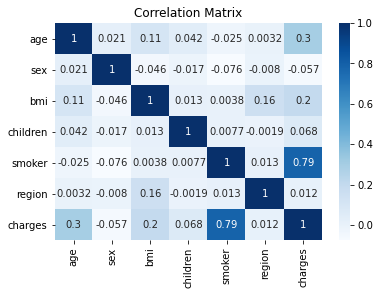

In [233]:
sns.heatmap(df_copy.corr(), cmap='Blues', annot=True)
plt.title('Correlation Matrix');

In [200]:
print(df['sex'].value_counts().sort_values()) 
print(df['smoker'].value_counts().sort_values())
print(df['region'].value_counts().sort_values())

female    662
male      676
Name: sex, dtype: int64
yes     274
no     1064
Name: smoker, dtype: int64
northeast    324
southwest    325
northwest    325
southeast    364
Name: region, dtype: int64


<AxesSubplot:title={'center':'Age vs Charge'}, xlabel='age', ylabel='charges'>

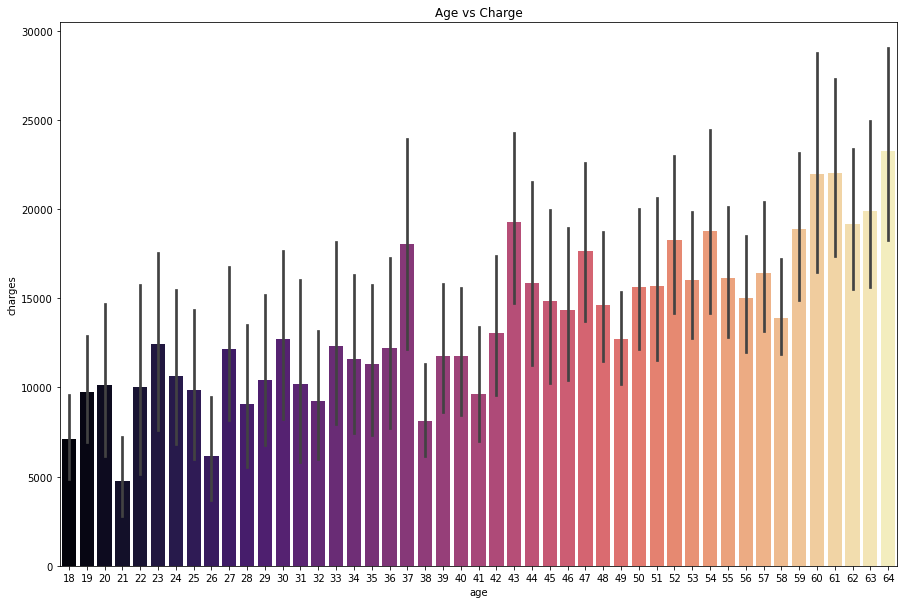

In [201]:
plt.figure(figsize=(15,10))
plt.title('Age vs Charge')
sns.barplot(x='age',y='charges',data=df_copy,palette='magma')

<AxesSubplot:title={'center':'Region vs Charge'}, xlabel='region', ylabel='charges'>

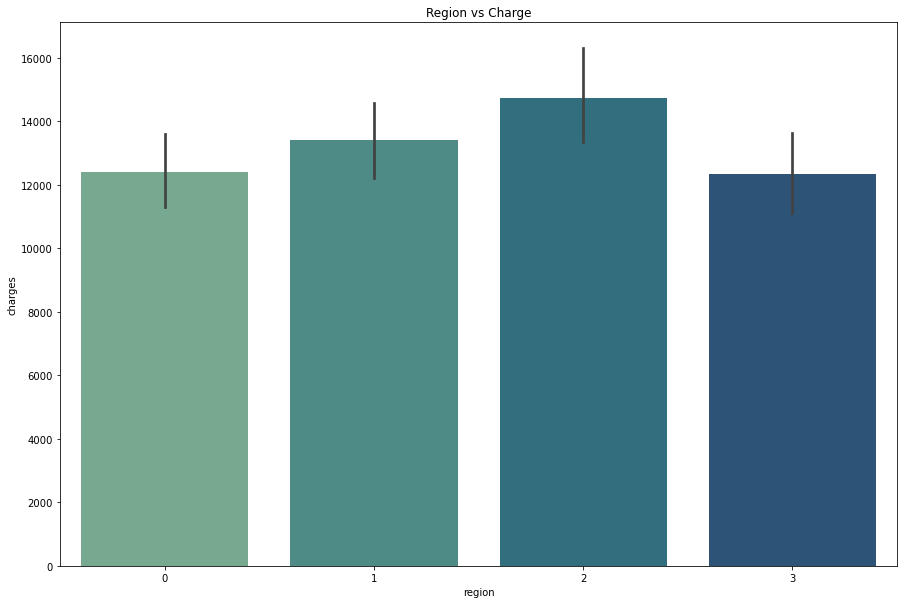

In [202]:
plt.figure(figsize=(15,10))
plt.title('Region vs Charge')
sns.barplot(x='region',y='charges',data=df_copy,palette='crest')

Text(0.5, 1.0, 'BMI VS Charge')

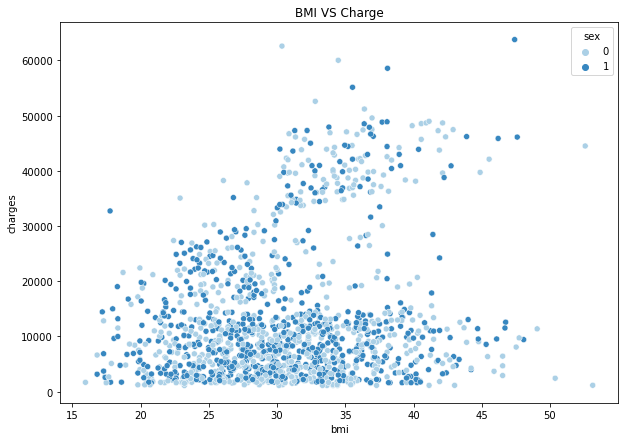

In [203]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='bmi',y='charges',hue='sex',data=df_copy,palette='Blues')
plt.title('BMI VS Charge')

<AxesSubplot:title={'center':'Smoker vs Charge'}, xlabel='smoker', ylabel='charges'>

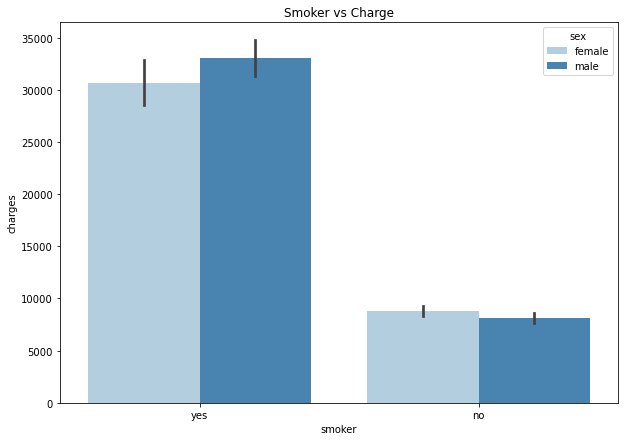

In [204]:
plt.figure(figsize=(10,7))
plt.title('Smoker vs Charge')
sns.barplot(x='smoker',y='charges',data=df,palette='Blues',hue='sex')

<AxesSubplot:title={'center':'Sex vs Charges'}, xlabel='sex', ylabel='charges'>

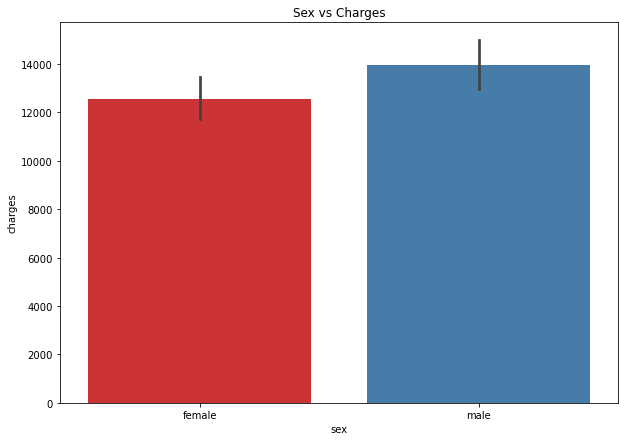

In [205]:
plt.figure(figsize=(10,7))
plt.title('Sex vs Charges')
sns.barplot(x='sex',y='charges',data=df,palette='Set1')

Text(0, 0.5, 'Count')

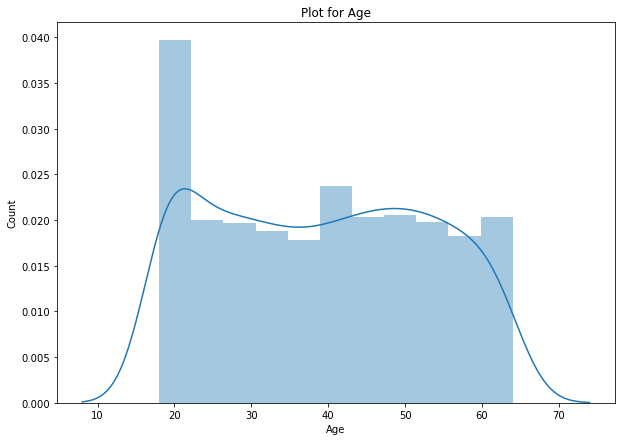

In [206]:
plt.figure(figsize=(10,7))
sns.distplot(df['age'])
plt.title('Plot for Age')
plt.xlabel('Age')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

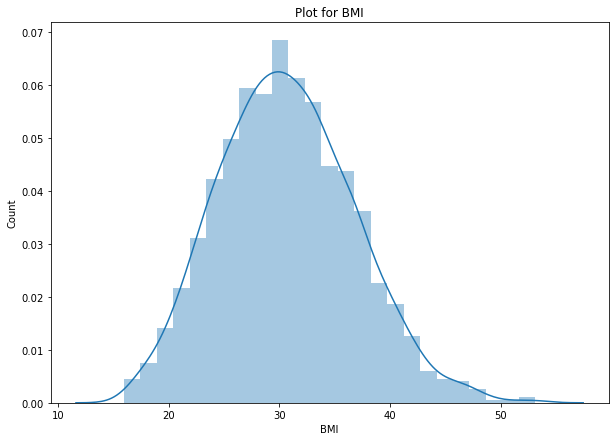

In [207]:
plt.figure(figsize=(10,7))
sns.distplot(df['bmi'])
plt.title('Plot for BMI')
plt.xlabel('BMI')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

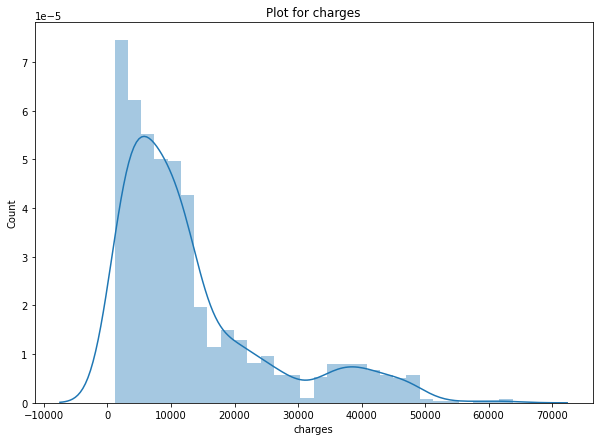

In [208]:
plt.figure(figsize=(10,7))
sns.distplot(df['charges'])
plt.title('Plot for charges')
plt.xlabel('charges')
plt.ylabel('Count')

In [209]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

data_pre = df.copy()

tempBmi = data_pre.bmi
tempBmi = tempBmi.values.reshape(-1,1)
data_pre['bmi'] = StandardScaler().fit_transform(tempBmi)

tempAge = data_pre.age
tempAge = tempAge.values.reshape(-1,1)
data_pre['age'] = StandardScaler().fit_transform(tempAge)

tempCharges = data_pre.charges
tempCharges = tempCharges.values.reshape(-1,1)
data_pre['charges'] = StandardScaler().fit_transform(tempCharges)

data_pre.head()


,age,sex,bmi,children,smoker,region,charges
0,-1.438764,female,-0.453320,0,yes,southwest,0.298584
1,-1.509965,male,0.509621,1,no,southeast,-0.953689
2,-0.797954,male,0.383307,3,no,southeast,-0.728675
3,-0.441948,male,-1.305531,0,no,northwest,0.719843
4,-0.513149,male,-0.292556,0,no,northwest,-0.776802


In [210]:
x=df.drop(['charges'],axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [211]:
y=df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [212]:
x.shape

(1338, 6)

In [213]:
y.shape

(1338,)

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=21)

In [215]:
x_train

,age,sex,bmi,children,smoker,region
1225,33,female,39.820,1,no,southeast
209,40,male,41.230,1,no,northeast
1309,41,male,32.200,2,no,southwest
1075,32,female,29.590,1,no,southeast
711,50,female,23.540,2,no,southeast
...,...,...,...,...,...,...
368,44,male,32.015,2,no,northwest
48,60,female,24.530,0,no,southeast
772,44,female,36.480,0,no,northeast
1231,20,female,21.800,0,yes,southwest


In [216]:
x_train.shape

(1070, 6)

In [217]:
x_test

,age,sex,bmi,children,smoker,region
831,36,female,25.840,0,no,northwest
1287,36,female,25.900,1,no,southwest
1259,52,female,23.180,0,no,northeast
827,36,male,28.025,1,yes,northeast
933,45,female,35.300,0,no,southwest
...,...,...,...,...,...,...
605,51,female,34.100,0,no,southeast
395,46,male,19.855,0,no,northwest
14,27,male,42.130,0,yes,southeast
803,18,female,42.240,0,yes,southeast


In [218]:
x_test.shape

(268, 6)

In [219]:
y_train

1225     4795.65680
209      6610.10970
1309     6875.96100
1075     4562.84210
711     10107.22060
           ...     
368      8116.26885
48      12629.89670
772     12797.20962
1231    20167.33603
969      8596.82780
Name: charges, Length: 1070, dtype: float64

In [220]:
y_train.shape

(1070,)

In [221]:
y_test

831      5266.36560
1287     5472.44900
1259    10197.77220
827     20773.62775
933      7348.14200
           ...     
605      9283.56200
395      7526.70645
14      39611.75770
803     38792.68560
234      6710.19190
Name: charges, Length: 268, dtype: float64

In [222]:
y_test.shape

(268,)